### Understand Gradient Boosting Machine (GBM)
In this analysis we will walk you through the nuts and bolts of the Gradient Boosting Machine (GBM). We will be using the 'gbm' R package developed by Greg Ridgeway. It is worth noting that 'dismo' package is another helpful gbm package.

We will use the Boston housing [data](https://www.kaggle.com/c/boston-housing). We choose this simple dataset so we can focus on the gradient boosting function itself. This dataset is also available in library(MASS).


The Boston Dataset contains 504 rows and 14 columns:
* **crim** per capita crime rate by town.
* **zn** proportion of residential land zoned for lots over 25,000 sq.ft.
* **indus** proportion of non-retail business acres per town.
* **chas** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **nox** nitrogen oxides concentration (parts per 10 million).
* **rm** average number of rooms per dwelling.
* **age** proportion of owner-occupied units built prior to 1940.
* **dis** weighted mean of distances to five Boston employment centres.
* **rad** index of accessibility to radial highways.
* **tax** full-value property-tax rate per 10,000 dollars.
* **ptratio** pupil-teacher ratio by town.
* **black** 1000(Bk−0.63)21000(Bk−0.63)2 where BkBk is the proportion of blacks by town.
* **lstat** lower status of the population (percent).
* **medv** median value of owner-occupied homes in $1000s.

In [30]:
library(MASS)
library(gbm)
library(dismo)

In [31]:
summary(Boston)
colnames(Boston)
head(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### Exploratory Data Analysis

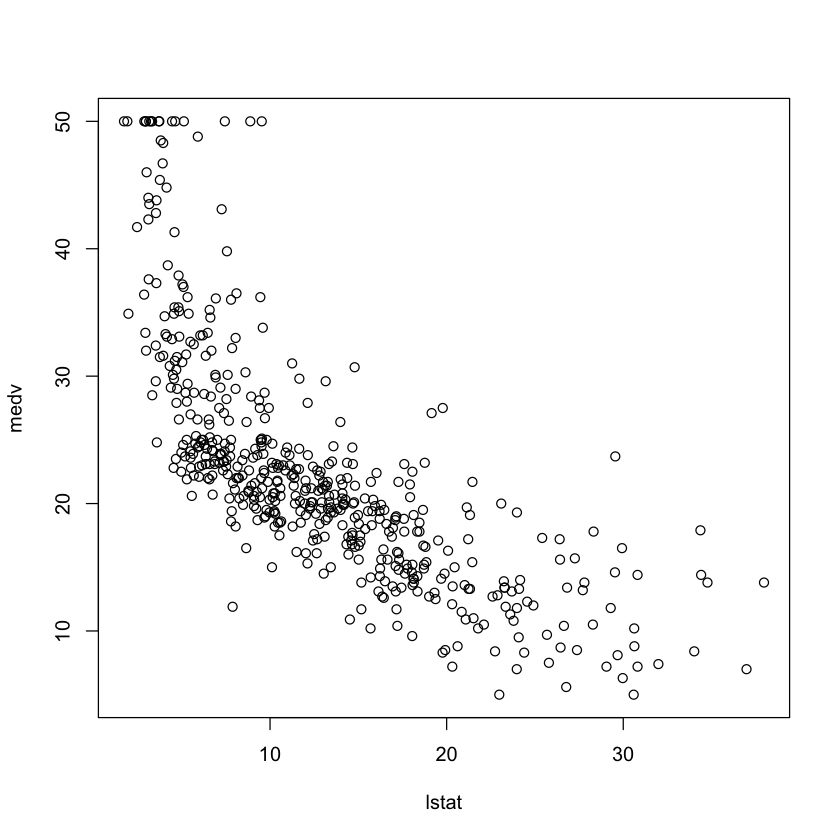

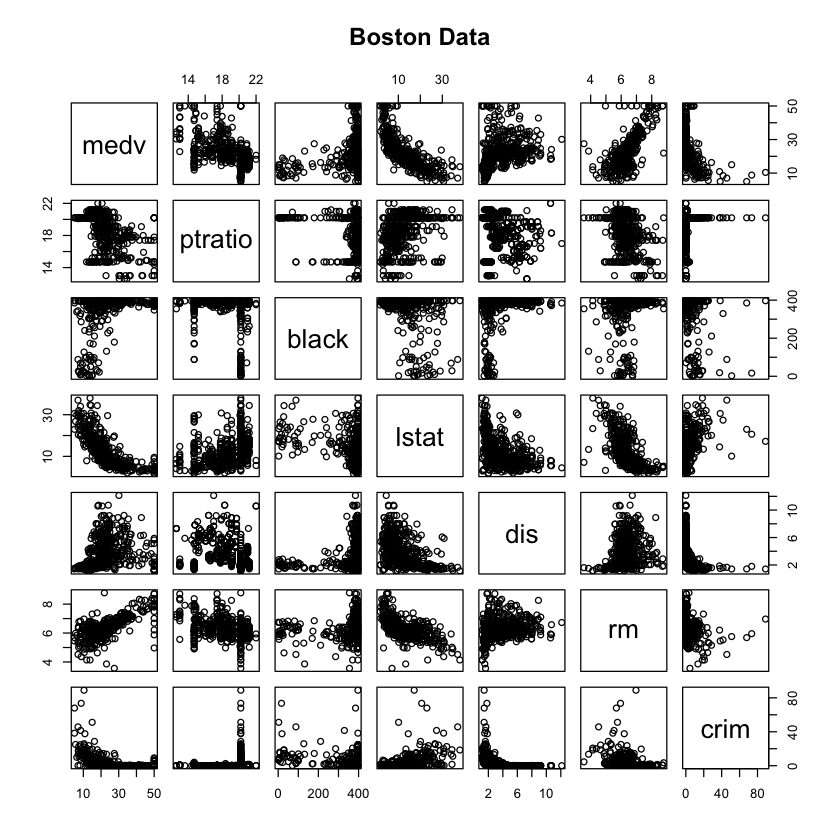

In [5]:
plot(medv~lstat, Boston)
pairs(~ medv + ptratio + black + lstat + dis + rm + crim, data = Boston, main = "Boston Data")

### A simple multivariate regression


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

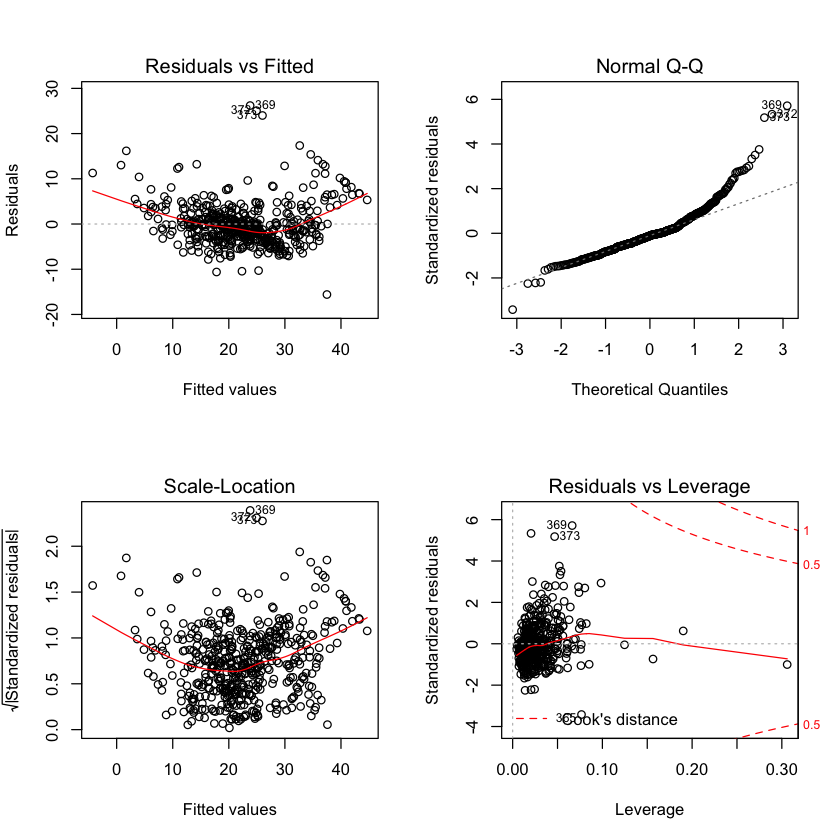

In [8]:
fit=lm(medv~.,Boston)
summary(fit)
par(mfrow=c(2,2))
plot(fit)

### GBM

**n.trees** is the number of trees.

**shrinkage** is also called the **learning rate**. 0.001 to 0.1 usually work.



**distribution** is the error distribution to be used in the model. The common options are:
* "bernoulli" for 0 and 1 outcomes as in logistic regression
* "gaussian" for continous outcomes,
* "poisson" for count outcomes,
* "coxph" for censored observations

**interaction.depth** is the interaction term. '1' is an additive model, 2: two-way interactions, etc.

**bag.fraction** is the subsampling fraction, 0.5 is probably the best

**train.fraction** is the fraction of data for training.

**n.minobsinnode** is the minimum observations needed in each node

**cv.folds** asks the model to perform a 3-fold to 10-fold cross-validation

**keep.data** is TRUE if you want to keep the input variables in the object

**verbose** is FALSE when you don't print out progress

**n.cores** is the number of CPU core. 

**var.monotone** is a vector of the same length as the number of predictors. It indicats which
variables have a monotone increasing (+1), decreasing (-1), or arbitrary (0) relationship
with the outcome.

In [34]:
gbm1 <- gbm(medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat, # formula
            data=Boston, # dataset
            distribution="gaussian", 
            n.trees=3000, 
            shrinkage=0.01, 
            interaction.depth=3,
            bag.fraction = 0.5, 
            train.fraction = 0.5, 
            n.minobsinnode = 10, 
            cv.folds = 3, 
            keep.data=TRUE, 
            verbose=FALSE, 
            n.cores=1,
            var.monotone= rep(0, length(1:13))
           ) 
summary(gbm1)

,var,rel.inf
rm,rm,58.08636890
lstat,lstat,21.68126028
age,age,3.48453611
ptratio,ptratio,3.26667729
dis,dis,3.17665778
indus,indus,2.78639851
crim,crim,2.02123188
tax,tax,1.83934331
black,black,1.42725625
nox,nox,1.28770918


ERROR: Error in dev.off(): QuartzBitmap_Output - unable to open file '/var/folders/jw/wyhtzlf94zbgtpf9g_n5tryr0000gn/T//RtmptYHVEO/file6aa2132e0d53.png'


plot without title

##### Using dismo package

In [35]:
dismo_gbm <- gbm.step(data=Boston, gbm.x = 1:13, gbm.y = 14,
                         family = "gaussian", 
                         tree.complexity = 5,
                         learning.rate = 0.01, 
                         bag.fraction = 0.5,
                         var.monotone = rep(0, length(1:13)))


 
 GBM STEP - version 2.9 
 
Performing cross-validation optimisation of a boosted regression tree model 
for medv and using a family of gaussian 
Using 506 observations and 13 predictors 
creating 10 initial models of 50 trees 

 folds are unstratified 
total mean deviance =  84.4196 
tolerance is fixed at  0.0844 
ntrees resid. dev. 
50    44.3473 
now adding trees... 
100   27.5402 
150   20.2336 
200   16.6828 
250   14.7582 
300   13.6334 
350   12.8785 
400   12.3334 
450   11.8961 
500   11.507 
550   11.2942 
600   11.0587 
650   10.859 
700   10.7005 
750   10.5554 
800   10.4148 
850   10.3016 
900   10.18 
950   10.0804 
1000   9.9771 
1050   9.9162 
1100   9.86 
1150   9.7803 
1200   9.7058 
1250   9.6508 
1300   9.6312 
1350   9.5849 
1400   9.5549 
1450   9.4807 
1500   9.4587 
1550   9.4182 
1600   9.4151 
1650   9.3921 
1700   9.3707 
1750   9.3527 
1800   9.3302 
1850   9.3039 
1900   9.2952 
1950   9.2714 
2000   9.2538 
2050   9.2361 
2100   9.2178 
2150   9.2025 
2

fitting final gbm model with a fixed number of 2550 trees for medv



mean total deviance = 84.42 
mean residual deviance = 1.617 
 
estimated cv deviance = 9.171 ; se = 1.74 
 
training data correlation = 0.991 
cv correlation =  0.943 ; se = 0.01 
 
elapsed time -  0.31 minutes 


ERROR: Error in dev.off(): QuartzBitmap_Output - unable to open file '/var/folders/jw/wyhtzlf94zbgtpf9g_n5tryr0000gn/T//RtmptYHVEO/file6aa2261e00de.png'


Plot with title “medv, d - 5, lr - 0.01”

##### "Variable importance plot" and "partial dependence plot"

You can produce the variable importance plot with a summary(), and the partial dependence plot with gbm.plot(). The code below will output the two plots to a physical file "sample.pdf".

In [44]:
tt<-getwd()
fn <- paste(tt,"sample.pdf")
if (file.exists(fn)) file.remove(fn)
pdf("sample.pdf", 7, 5)

summary(dismo_gbm)
gbm.plot(dismo_gbm, n.plots=13, write.title = FALSE)

dev.off()

Warning message in plot.new():
“Cannot open temporary file '/var/folders/jw/wyhtzlf94zbgtpf9g_n5tryr0000gn/T//RtmptYHVEO/pdf6aa27a349d7b' for compression (reason: No such file or directory); compression has been turned off for this device”

,var,rel.inf
lstat,lstat,38.28249990
rm,rm,33.25822204
dis,dis,7.92987990
nox,nox,4.55998741
crim,crim,3.89516743
age,age,3.34275971
ptratio,ptratio,3.16297967
black,black,2.14177961
tax,tax,1.54048560
indus,indus,0.76027639


pdf 
  4

### Pipeline & Grid search

In modeling you often find yourself doing the following tasks repeatedly:

* data splitting
* pre-processing
* feature selection
* grid-search for hyperparameters 
* model tuning using resampling
* variable importance estimation.

It makes sense to create a pipeline to streamline the process. We are going to use the caret package. **Caret** stands for **C**lassification **A**nd **RE**gression **T**raining. 

In [45]:
library(caret)

It is important to use resampling techniques, such as repeated K-fold cross-validation or leave-one-out, to mitigate overfitting problem. The function in *caret* is **trainControl**.  The follow resampling techniques are the most common options:

* **bootstrap (boot)**: Sample with replacement from the dataset. Example: train_control <- trainControl(method="boot", number=100)

* **k-fold Cross Validation (CV)**: Separate the dataset into k-subsets. Example: train_control <- trainControl(method="cv", number=10)

* **repeated K-fold cross-validation (repeatedcv)**: This is similar to k-fold CV, except repeating the entire sampling process several times. Example: train_control <- trainControl(method="repeatedcv", number=10, repeats=3)

* **leave-out-one cross-validation (LOOCV)**: One data point is left out. The model is built on all other data. This process is repeated for all data points. Example: train_control <- trainControl(method="LOOCV")


In [12]:
# prepare training control parameters
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

# train the model
caret_gbm <- train(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat, 
               data=Boston, 
               method="gbm", trControl=fitControl,
              verbose=FALSE)
# summarize the model
print(caret_gbm)

Stochastic Gradient Boosting 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 456, 456, 455, 457, 456, 454, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                   50      4.097655  0.8067650  2.875146
  1                  100      3.772171  0.8314119  2.622473
  1                  150      3.673629  0.8400217  2.554170
  2                   50      3.692750  0.8391360  2.549730
  2                  100      3.446184  0.8590171  2.381101
  2                  150      3.328002  0.8685939  2.321598
  3                   50      3.509992  0.8543036  2.418674
  3                  100      3.266882  0.8730331  2.264261
  3                  150      3.177306  0.8796181  2.204974

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to select 

#### Parallel processing

In [14]:
# ensure results are repeatable
set.seed(7)
# configure multicore
# install.packages("doMC")
library(doMC)
registerDoMC(cores=4)

# prepare training control parameters
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

# train the model
caret_gbm <- train(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat, 
               data=Boston, 
               method="gbm", trControl=fitControl,
              verbose=FALSE)
# summarize the model
print(caret_gbm)

Loading required package: foreach
Loading required package: iterators


Stochastic Gradient Boosting 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 456, 456, 455, 456, 456, 454, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                   50      4.094844  0.8062020  2.866599
  1                  100      3.779998  0.8302982  2.627579
  1                  150      3.671720  0.8397430  2.548094
  2                   50      3.691414  0.8382847  2.562584
  2                  100      3.448609  0.8579418  2.401210
  2                  150      3.342027  0.8666589  2.334821
  3                   50      3.520025  0.8526326  2.425004
  3                  100      3.287853  0.8709103  2.265591
  3                  150      3.198258  0.8777935  2.216999

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to select 

##### Grid-search

In [25]:
# ensure results are repeatable
set.seed(7)

# prepare training control parameters
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)



gbmgrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = (1:10)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)
                        
nrow(gbmGrid)

# train the model
gbm_grid <- train(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat, 
               data=Boston, 
               method="gbm", trControl=fitControl, tuneGrid=gbmgrid)

gbm_grid

[1] 90

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       72.8756             nan     0.1000   11.3061
     2       63.1580             nan     0.1000    9.5542
     3       54.6386             nan     0.1000    7.2150
     4       47.6095             nan     0.1000    6.5710
     5       42.1066             nan     0.1000    5.3902
     6       37.7484             nan     0.1000    4.1489
     7       33.6193             nan     0.1000    3.5755
     8       30.2951             nan     0.1000    3.2291
     9       27.7379             nan     0.1000    2.3909
    10       25.7149             nan     0.1000    1.9885
    20       14.3783             nan     0.1000    0.4541
    40        9.5310             nan     0.1000    0.0542
    60        7.5238             nan     0.1000    0.0098
    80        6.5590             nan     0.1000   -0.0460
   100        5.8865             nan     0.1000   -0.0574
   120        5.0829             nan     0.1000   -0.0794
   140        

Stochastic Gradient Boosting 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 456, 456, 455, 456, 456, 454, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                   50      4.206825  0.7934536  2.925185
  1                  100      3.948260  0.8150958  2.724027
  1                  150      3.844895  0.8246231  2.667585
  1                  200      3.783136  0.8304850  2.651361
  1                  250      3.745791  0.8337800  2.635649
  1                  300      3.724525  0.8357001  2.637009
  1                  350      3.714221  0.8368617  2.638171
  1                  400      3.699230  0.8382673  2.634704
  1                  450      3.689515  0.8391234  2.630587
  1                  500      3.688596  0.8394196  2.634330
  5                   50      3.642915  0.8428781  2.460443
  5                  100      3.442581  

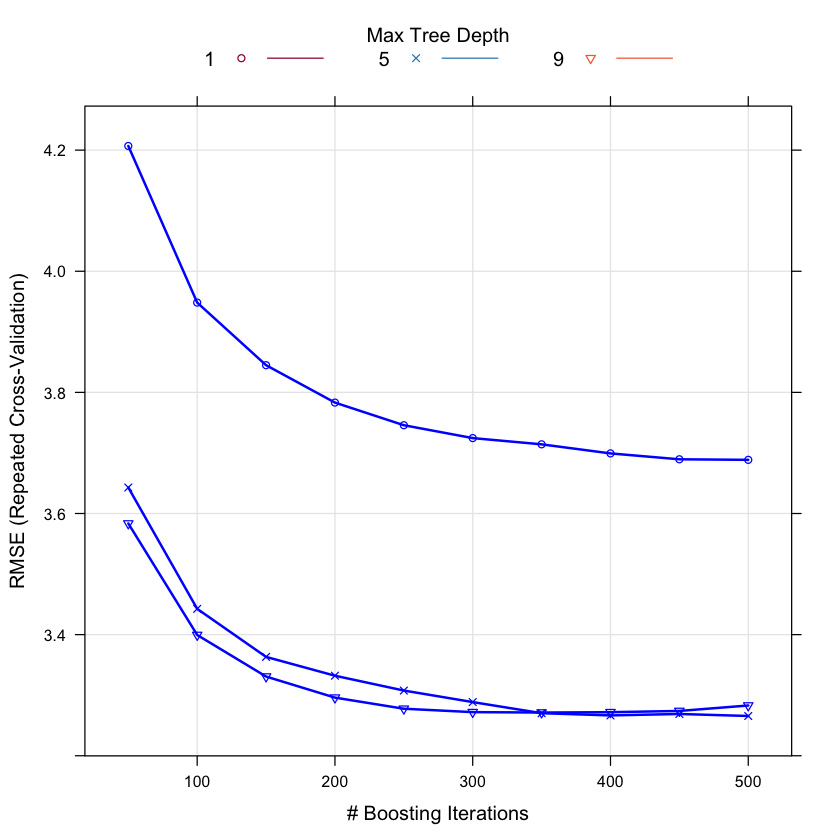

In [26]:
 plot(gbm_grid, i.var = 1, lwd = 2, col = "blue", main = "")

Stochastic Gradient Boosting 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 456, 456, 455, 456, 456, 454, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                    50     4.206825  0.7934536  2.925185
  1                   100     3.948260  0.8150958  2.724027
  1                   150     3.844895  0.8246231  2.667585
  1                   200     3.783136  0.8304850  2.651361
  1                   250     3.745791  0.8337800  2.635649
  1                   300     3.724525  0.8357001  2.637009
  1                   350     3.714221  0.8368617  2.638171
  1                   400     3.699230  0.8382673  2.634704
  1                   450     3.689515  0.8391234  2.630587
  1                   500     3.688596  0.8394196  2.634330
  1                   550     3.677579  0.8404525  2.633058
  1                   600     3.674792  

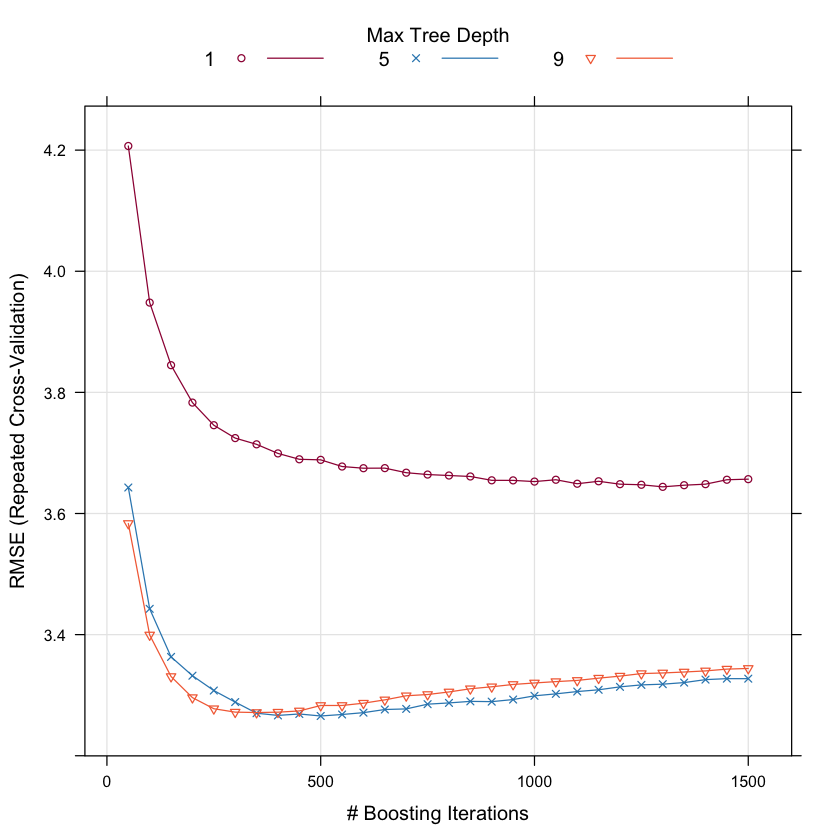

In [23]:
trellis.par.set(caretTheme())
plot(gbm_grid)  
print(gbm_grid)